In [1]:
import yt  # Simulation plotting package
import matplotlib.pyplot as plt  # General purpose plotting
import matplotlib as mpl
%matplotlib widget

import numpy as np   # General purpose math and array manipulation

# These are FOGGIE-specific functions that make loading in the dataset easier
from foggie.utils.consistency import *
from foggie.utils.yt_fields import *
from foggie.utils.foggie_load import *
from foggie.utils.analysis_utils import *

Now we need to specify the file directory paths to where various pieces are stored. Be sure to change these to wherever you've put the files!!!

In [2]:
foggie_dir = "/Users/clochhaas/Documents/Research/FOGGIE/Simulation_Data/halo_005036/nref11c_nref9f/"  # Path to where the simulation data itself is stored. CHANGE THIS TO YOUR OWN DIRECTORY PATH
code_path = "/Users/clochhaas/Documents/Research/FOGGIE/Analysis_Code/foggie/foggie/"  # Path to where the FOGGIE code you downloaded from GitHub is stored. CHANGE THIS TO YOUR OWN DIRECTORY PATH

# These next two are needed for finding the galaxy halo we're interested in from the whole dataset:
halo_c_v_name = code_path + 'halo_infos/005036/nref11c_nref9f/halo_c_v'                         # DON'T CHANGE THIS
track_name = code_path + 'halo_tracks/005036/nref11n_selfshield_15/halo_track_200kpc_nref9'     # DON'T CHANGE THIS

# Finally, specify which snapshot you want to load in. This is the only one I've given you so far, but eventually there will be others:
snap = 'DD2520'
snap_name = foggie_dir + snap + '/' + snap

With the locations of all the necessary pieces defined, we can now load the actual simulation data, which gets stored into the variable 'ds':

In [3]:
ds, refine_box = foggie_load(snap_name, track_name, halo_c_v_name=halo_c_v_name)

Opening snapshot /Users/clochhaas/Documents/Research/FOGGIE/Simulation_Data/halo_005036/nref11c_nref9f/DD2520/DD2520


yt : [INFO     ] 2024-12-10 17:10:23,295 Parameters: current_time              = 639.44480357087
yt : [INFO     ] 2024-12-10 17:10:23,295 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2024-12-10 17:10:23,296 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-12-10 17:10:23,296 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2024-12-10 17:10:23,296 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2024-12-10 17:10:23,296 Parameters: current_redshift          = 0
yt : [INFO     ] 2024-12-10 17:10:23,297 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2024-12-10 17:10:23,297 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2024-12-10 17:10:23,297 Parameters: omega_radiation           = 0
yt : [INFO     ] 2024-12-10 17:10:23,298 Parameters: hubble_constant           = 0.695


get_refine_box: using this location: col1   col2     col3     col4     col5     col6     col7   col8
---- -------- -------- -------- -------- -------- -------- ----
 0.0 0.465138 0.500866 0.499993 0.467138 0.502866 0.501993    9


Parsing Hierarchy : 100%|██████████| 6145/6145 [00:00<00:00, 31321.05it/s]
yt : [INFO     ] 2024-12-10 17:10:23,691 Gathering a field list (this may take a moment.)


Pulling halo center from catalog file
filtering young_stars particles...
filtering young_stars3 particles...
filtering young_stars8 particles...
filtering old_stars particles...
filtering stars particles...
filtering dm particles...


Let's start with just looking at the data. This is a cosmological simulation, which means it simulates a huge chunk of space in which there are many galaxies as well as gas spread out between them. We're expecting to see a "cosmic web"-like structure. The cosmic web is essentially what happens when you start with a universe that just has lots and lots of gas in it, and gravity starts pulling the slightly denser regions into even more dense regions, where the gas then collapses into stars and galaxies. In the FOGGIE simulations, the gas is simulated on a 3D grid. Imagine a giant cube made up of lots of little cubes. Each of those little cubes, which we call "cells", has a single value of various gas properties associated with it, like density, temperature, pressure, and a velocity vector. You can also think of this like pixels in an image -- each pixel has just one color, but altogether they make up a picture. Each of the simulated cells has just one density, one temperature, etc., but altogether they make up the galaxies and chunk of the universe we're simulating. Just like how having more pixels in an image means having a better resolution, where the image is clearer and sharper, having a higher resolution in the simulation (more cells, each individual cell is smaller), makes a clearer, more physically realistic universe.

The yt.ProjectionPlot() function call is the most basic form of plot to quickly look at simulation data. It makes a projection, which means it converts the 3D simulation cube into a 2D image by showing you everything along the chosen line of sight -- just like taking a photo of a 3D object. In this case, we want to look at the density of all the gas in the simulation. Because the simulation is a cube, it has x, y, and z spatial coordinates, and we can choose to project the data along any of those three directions. Try changing the direction of the projection from 'x' to 'y' or 'z' to see how it changes! This is the same data, just viewed from different angles. The first argument, ds, tells yt which dataset to use, which you just loaded above. The second argument is the direction of the projection, and the third is the thing that you want to project, in this case the gas density.

yt : [INFO     ] 2024-12-10 17:10:33,119 Projection completed
yt : [INFO     ] 2024-12-10 17:10:33,120 xlim = 0.000000 1.000000
yt : [INFO     ] 2024-12-10 17:10:33,121 ylim = 0.000000 1.000000
yt : [INFO     ] 2024-12-10 17:10:33,122 xlim = 0.000000 1.000000
yt : [INFO     ] 2024-12-10 17:10:33,122 ylim = 0.000000 1.000000
yt : [INFO     ] 2024-12-10 17:10:33,124 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



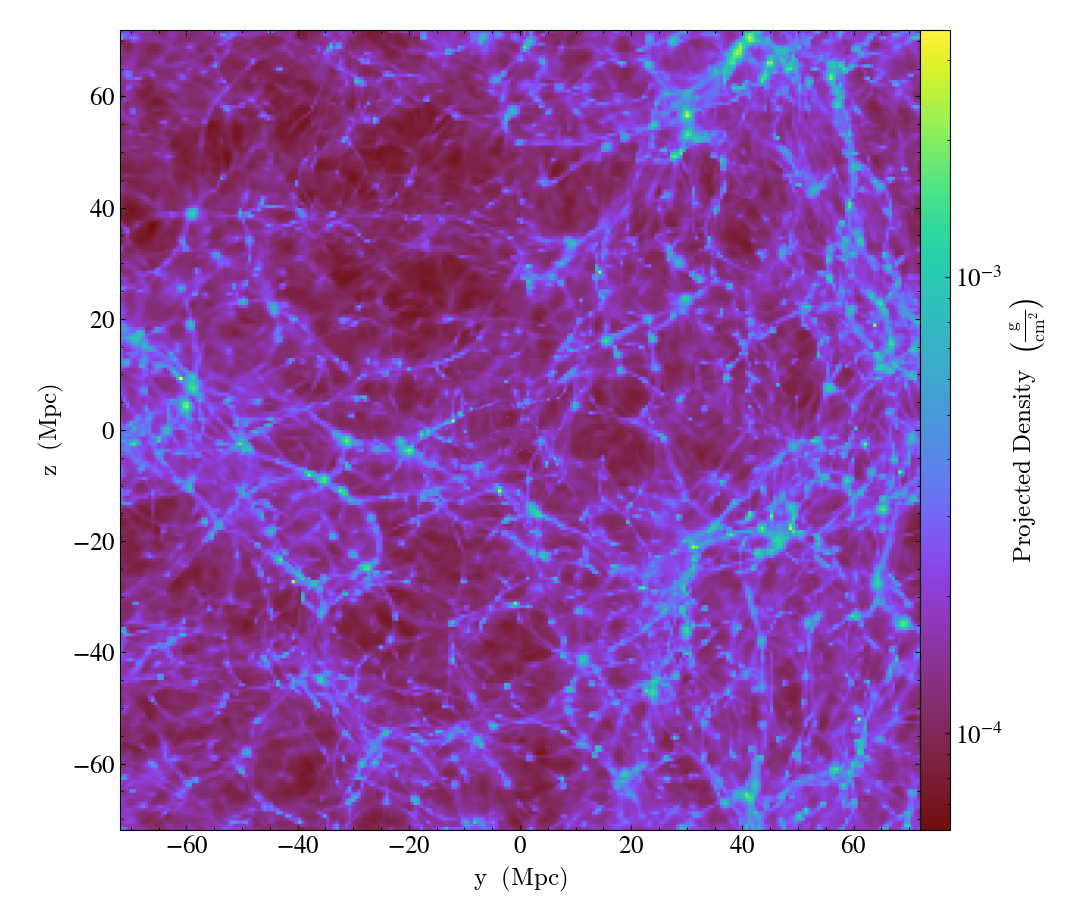

In [4]:
plot = yt.ProjectionPlot(ds, 'x', ('gas','density'))
plot.show() # Put the plot inline here

Now let's zoom in on the galaxy that we're interested in. Don't worry, you don't have to find it in that huge chunk of simulation -- the x, y, z coordinates of its location are calculated by the call you made above to foggie_load() and then stored in the variable ds.halo_center_kpc (the galaxy's halo center, given in kiloparsecs). You can pass this to ProjectionPlot with the 'center' keyword. Since we want to zoom in to just look at this galaxy, let's also pass it 'width' and choose 200 kiloparsecs.

yt : [INFO     ] 2024-12-10 17:10:46,170 Projection completed
yt : [INFO     ] 2024-12-10 17:10:46,171 xlim = 0.501122 0.502512
yt : [INFO     ] 2024-12-10 17:10:46,171 ylim = 0.500294 0.501684
yt : [INFO     ] 2024-12-10 17:10:46,172 xlim = 0.501122 0.502512
yt : [INFO     ] 2024-12-10 17:10:46,172 ylim = 0.500294 0.501684
yt : [INFO     ] 2024-12-10 17:10:46,173 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



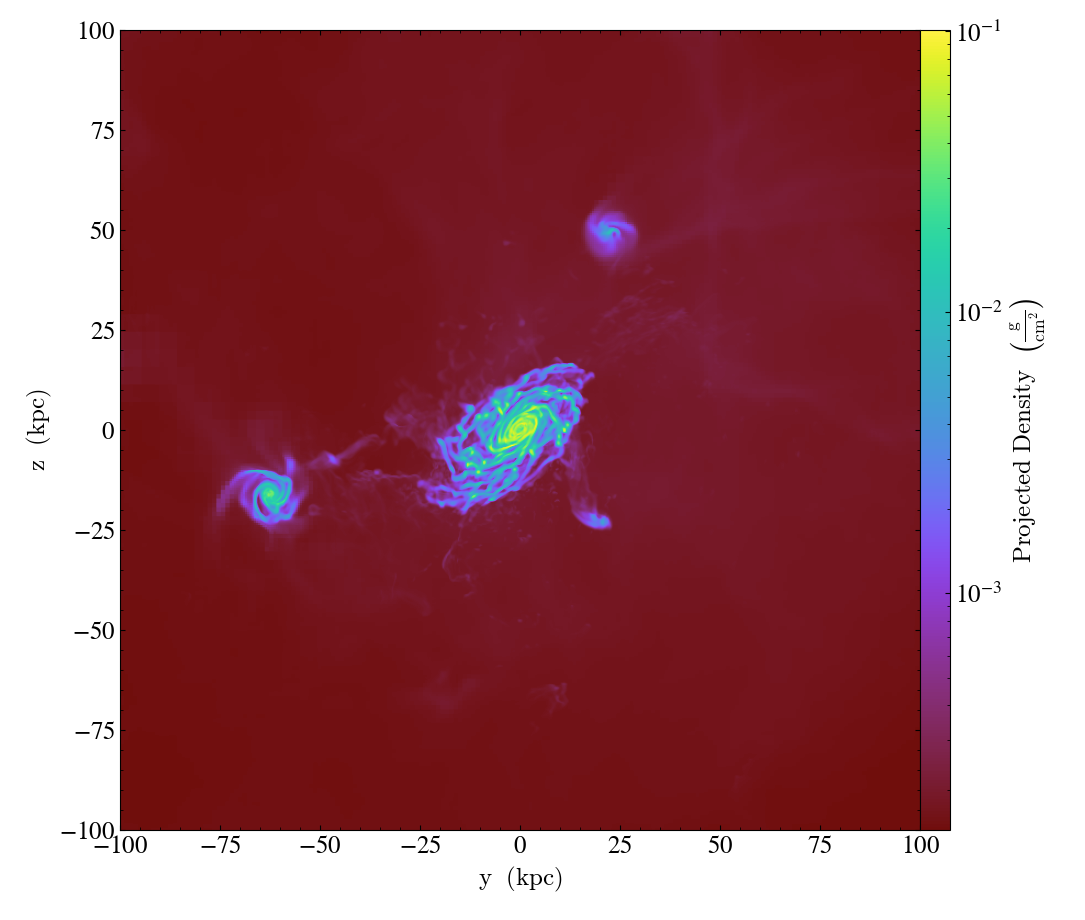

In [5]:
plot = yt.ProjectionPlot(ds, 'x', ('gas','density'), center=ds.halo_center_kpc, width=(200., 'kpc'))
plot.show()

We're interested in the gas outside of the galaxy in the circumgalactic medium, which is a little hard to see. Let's change both the units and the limits of the color bar to try to highlight it a little better. Notice that these function calls act on the plot that you've already made, so you do have to make the plot first before you can change units or limits.

Even though we're looking at density, where we would expect the units to be mass/volume, this is a projection showing us everything along the line of sight. For density, that usually means the gas density is added up along the third dimension into the image, and that changes the units to mass/area. This is also called a "column density", because it's the gas density in the "column" along the line of sight. You've probably heard of column density in the background reading too -- it's what observers measure, since we can only ever observe our own universe in projection and along the only line of sight we have, given by our location on Earth.


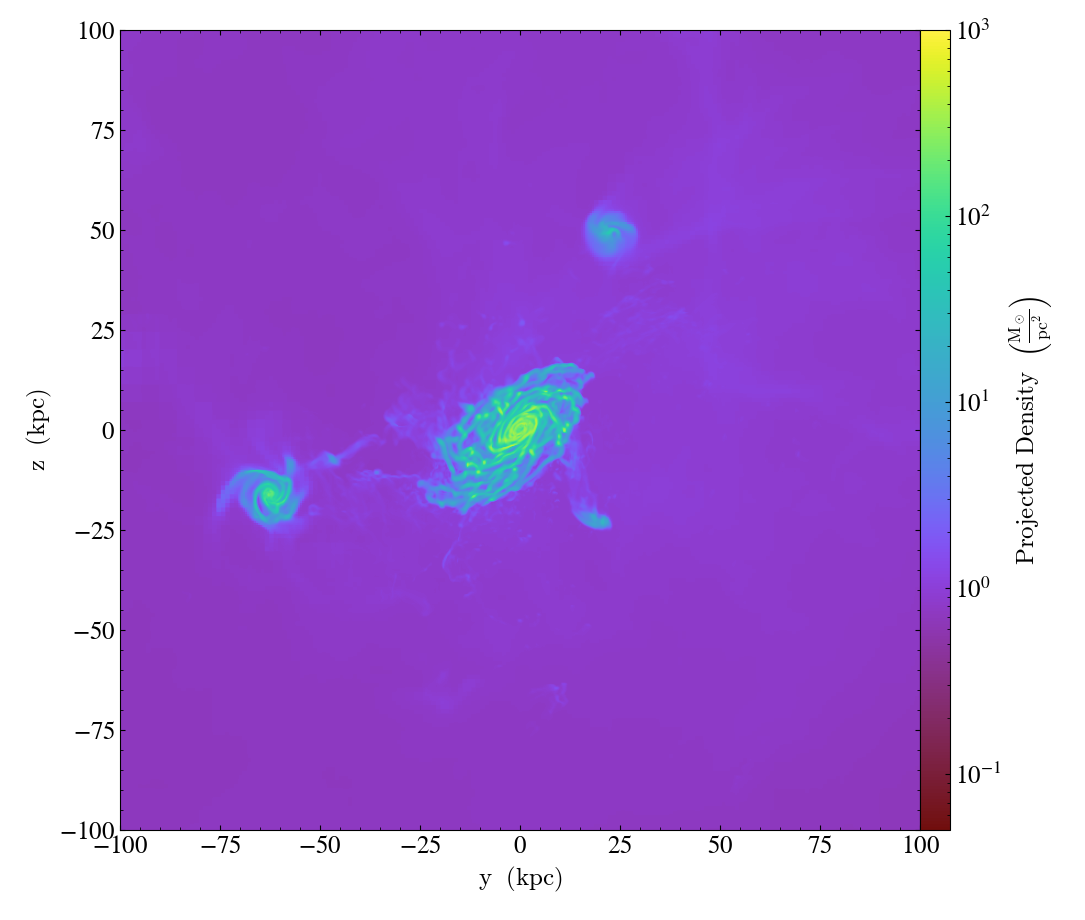

In [6]:
plot.set_unit(('gas','density'), 'Msun/pc**2') # These units are solar masses per square parsec. Not very intuitive, but makes the numbers a little easier to deal with.
plot.set_zlim(('gas','density'),5e-2,1e3)  # "zlim" means the color bar limits, since 'z' is usually the third dimension (indicated by color) on a plot. This is NOT related to the z direction coordinate in the simulation.
plot.show()

Now let's look at temperature of the gas. Let's do this in a slice rather than projection. This is just what it sounds like: we're taking a 2D slice of the 3D simulation, looking at only those cells that sit exactly in that 2D plane and ignoring all the rest. We can also change the colormap to something a little more "hot", and set the bounds to highlight the differences in the CGM. Let's pick a slice that goes through the middle of the galaxy:

yt : [INFO     ] 2024-12-10 17:10:58,977 xlim = 0.501122 0.502512
yt : [INFO     ] 2024-12-10 17:10:58,978 ylim = 0.500294 0.501684
yt : [INFO     ] 2024-12-10 17:10:58,979 xlim = 0.501122 0.502512
yt : [INFO     ] 2024-12-10 17:10:58,979 ylim = 0.500294 0.501684
yt : [INFO     ] 2024-12-10 17:10:58,980 Making a fixed resolution buffer of (('gas', 'temperature')) 800 by 800



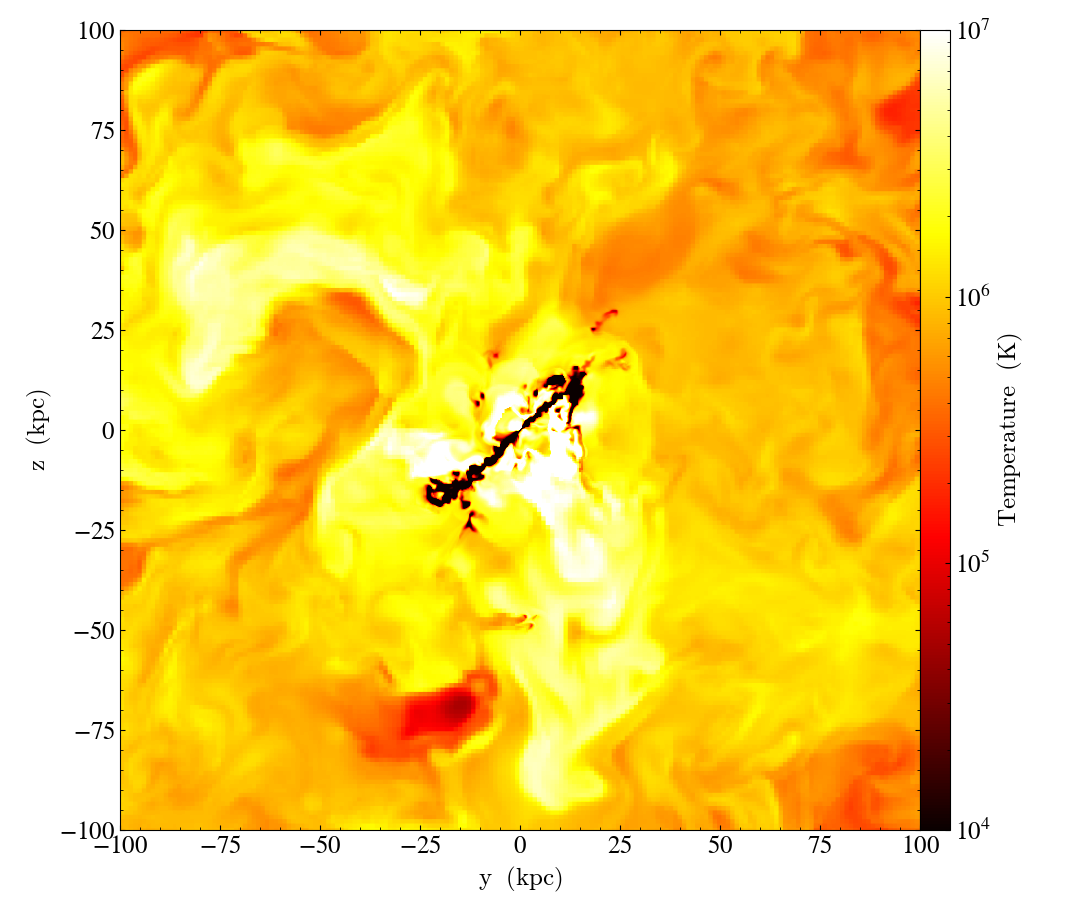

In [7]:
slice = yt.SlicePlot(ds, 'x', ('gas','temperature'), center=ds.halo_center_kpc, width=(200.,'kpc'))
slice.set_cmap(('gas','temperature'), 'hot')
slice.set_zlim(('gas','temperature'), 1e4, 1e7)
slice.show()

Finally, let's see where the stars are located in these galaxies. Stars are usually what we observe, so a lot of the information we've been looking at in the gas, like the pretty spiral arm structure, disappears if we look at stars. This is why working with simulations is so cool -- we get to see all the stuff that observations of the real universe can't show us!

In the simulations, the stars are particles, unlike the gas, which is simulated on a 3D grid. Each particle actually represents thousands of stars all moving together, because we don't have the computational resources to simulate every single individual star. We won't be working with the stars in this project, but it can help to gain some perspective just to see where they are:

yt : [INFO     ] 2024-12-10 17:11:02,760 xlim = 0.501122 0.502512
yt : [INFO     ] 2024-12-10 17:11:02,761 ylim = 0.500294 0.501684
yt : [INFO     ] 2024-12-10 17:11:02,763 xlim = 0.501122 0.502512
yt : [INFO     ] 2024-12-10 17:11:02,764 ylim = 0.500294 0.501684
yt : [INFO     ] 2024-12-10 17:11:02,765 Splatting (('stars', 'particle_mass')) onto a 800 by 800 mesh using method 'ngp'



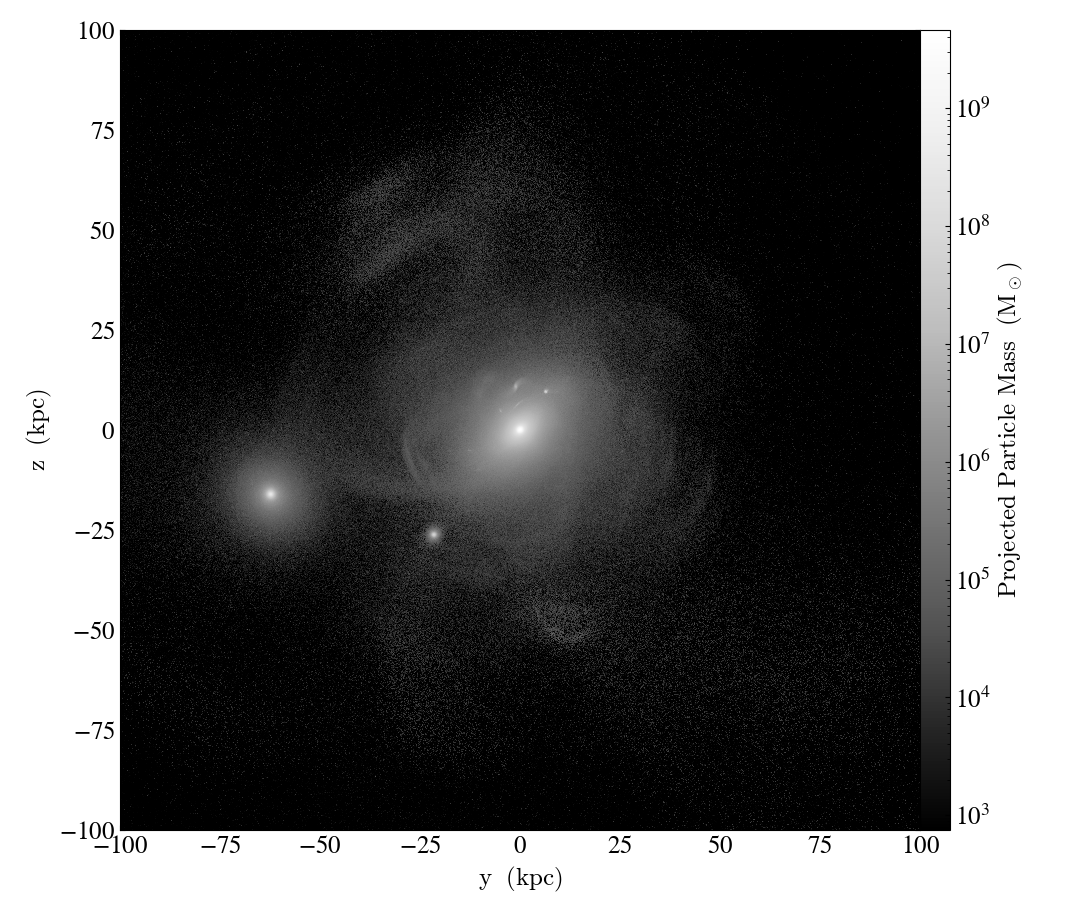

In [8]:
plot = yt.ParticlePlot(ds, ("stars", "particle_position_y"), # Specify the horizontal axis of the plot
    ("stars", "particle_position_z"),                        # Specify the vertical axis
    ("stars", "particle_mass"),                              # Specify the color bar
    center=ds.halo_center_kpc, width=(200., 'kpc'))          # Specify the center and width of the image
plot.set_unit(('stars', 'particle_mass'), 'Msun')            # Change the units to solar masses
plot.set_cmap(('stars','particle_mass'),'Greys_r')           # Change the colormap to use
plot.set_background_color(('stars','particle_mass'),'k')     # Set the background color of the image to black (black is 'k' in python plotting)
plot.show()

Making plots like this with yt is best for doing quick checks or just getting some intuition from looking at visuals. For the most part, you're going to want to be manipulating the simulation data directly, and for that it's best to convert the data into arrays. First, we have to define a chunk of the simulation dataset that we want to use. Let's use a sphere, centered on the center of the galaxy and extending out to 200 kpc in radius.

In [9]:
sphere = ds.sphere(center=ds.halo_center_kpc, radius=(200., 'kpc'))
density_in_sphere = sphere[('gas','density')].in_units('g/cm**3').v     # This creates an array of the density of every simulated cell (little 3D cube) inside the sphere, in units of g/cm^3, and the .v on the end converts it into a simple array of values.
temperature_in_sphere = sphere[('gas','temperature')].in_units('K').v   # This is an array of the temperature in Kelvin of every cell.

In [10]:
print(np.max(density_in_sphere), np.min(density_in_sphere), np.mean(density_in_sphere)) # We can print these just to take a look

5.028348096576754e-23 7.128165741209089e-32 4.4462436624063734e-27


In [11]:
print(np.max(temperature_in_sphere), np.min(temperature_in_sphere), np.mean(temperature_in_sphere)) # We can print these just to take a look

268136483.21157527 5.067168313646884 1205619.1511036232


Now that we have these arrays, we can make a 2D histogram of gas density and temperature using matplotlib:

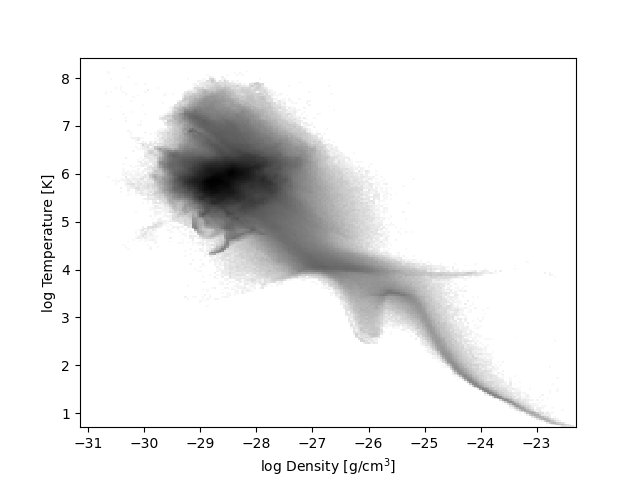

In [12]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(1,1,1)
# We'll use log scales for the density, temperature, and the normalization of the histogram too, to make it easier to see everything:
ax1.hist2d(np.log10(density_in_sphere), np.log10(temperature_in_sphere), bins=(200,200), cmap='Greys', norm=mpl.colors.LogNorm())
ax1.set_xlabel('log Density [g/cm$^3$]')
ax1.set_ylabel('log Temperature [K]')
plt.show()

The coldest, densest tail (bottom right) is the gas inside the galaxy itself, while the warmer and more diffuse gas (top left) is that located outside of the galaxy in the CGM. This should look familiar -- it's the same type of plot as in the Tumlinson, Peeples, and Werk (2017) review article.

Let's see what this looks like if we change the horizontal axis to gas velocity instead of density:

In [13]:
velocity_in_sphere = sphere[('gas','vel_mag_corrected')].in_units('km/s').v   # This field is calculated by foggie_load() and corrects for the motion of the galaxy through the bigger simulation box, so a value of 0 km/s means "0 km/s with respect to the galaxy"
print(np.min(velocity_in_sphere), np.max(velocity_in_sphere), np.mean(velocity_in_sphere))

0.06904688399335392 3179.748160008017 157.79982299024797


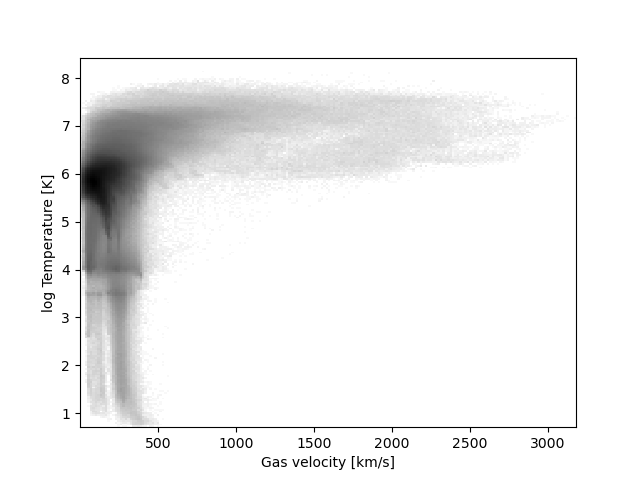

In [14]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(1,1,1)
ax2.hist2d(velocity_in_sphere, np.log10(temperature_in_sphere), bins=(200,200), cmap='Greys', norm=mpl.colors.LogNorm())
ax2.set_xlabel('Gas velocity [km/s]')
ax2.set_ylabel('log Temperature [K]')
plt.show()

Most of the gas has pretty low speeds, but there's some really fast and hot gas there! Based on your reading, what do you think that gas might be? Where did it come from, and where is it going?

We can also look at the radial velocity, which is the gas velocity only along the radial direction of the galaxy halo -- gas moving exactly towards or exactly away from the galaxy:

In [15]:
rv_in_sphere = sphere[('gas','radial_velocity_corrected')].in_units('km/s').v   # This field is also calculated by foggie_load() and corrected in the same way
print(np.min(rv_in_sphere), np.max(rv_in_sphere), np.mean(rv_in_sphere))

-855.1187960305302 3175.4706694093884 11.733811988223714


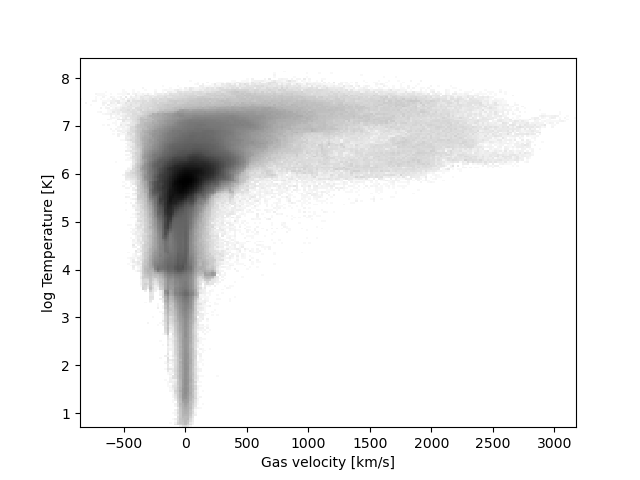

In [16]:
fig3 = plt.figure()
ax3 = fig3.add_subplot(1,1,1)
ax3.hist2d(rv_in_sphere, np.log10(temperature_in_sphere), bins=(200,200), cmap='Greys', norm=mpl.colors.LogNorm())
ax3.set_xlabel('Gas velocity [km/s]')
ax3.set_ylabel('log Temperature [K]')
plt.show()

We still see most of the gas has fairly low radial velocities relative to the central galaxy, but now that we've defined a direction (in and out) to our velocity, the negative values indicates gas that is flowing inward, toward the galaxy, while the positive values indicates gas flowing outwards, away from the galaxy. Does this help you to identify the hot and fast gas?

See if you can play around with and try out some of the other functionality that yt has. Your first goal here is just to get a feel for working with the simulation data and a general sense of what it looks like. The yt documentation is very helpful: https://yt-project.org/doc/